<a href="https://colab.research.google.com/github/sergiogrmds/Impulsion-Pump/blob/main/Bomba_Impulsora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Bomba Impulsora/dataset_bomba_mantenimiento.csv")
df = df.drop(["Timestamp"], axis=1)

In [3]:
df.head()

,Horas_Operacion,Flujo_GPM,Presion_Salida_PSI,Presion_Entrada_PSI,Velocidad_RPM,Temperatura_Cojinetes_C,Vibracion_mm_s,Potencia_Consumida_kW,Temperatura_Ambiente_C,Tiempo_Para_Prox_Mantencion_horas,Falla
0,0,9895.05,101.16,40.35,1307,57.59,2.44,651.60,4,100,0
1,4,10175.91,103.40,45.87,1175,58.18,3.87,645.18,6,96,0
2,8,9625.42,100.24,36.17,1176,52.44,2.94,657.37,21,92,0
3,12,10435.27,104.40,41.14,1284,56.74,2.97,665.15,21,88,0
4,16,10154.36,99.22,32.63,1032,58.36,2.31,644.03,29,84,1


In [4]:
print("La dimensión del dataframe es:", df.shape)

La dimensión del dataframe es: (1104, 11)


In [5]:
df.isnull().sum()

,0
Horas_Operacion,0
Flujo_GPM,0
Presion_Salida_PSI,0
Presion_Entrada_PSI,0
Velocidad_RPM,0
Temperatura_Cojinetes_C,0
Vibracion_mm_s,0
Potencia_Consumida_kW,0
Temperatura_Ambiente_C,0
Tiempo_Para_Prox_Mantencion_horas,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Horas_Operacion                    1104 non-null   int64  
 1   Flujo_GPM                          1104 non-null   float64
 2   Presion_Salida_PSI                 1104 non-null   float64
 3   Presion_Entrada_PSI                1104 non-null   float64
 4   Velocidad_RPM                      1104 non-null   int64  
 5   Temperatura_Cojinetes_C            1104 non-null   float64
 6   Vibracion_mm_s                     1104 non-null   float64
 7   Potencia_Consumida_kW              1104 non-null   float64
 8   Temperatura_Ambiente_C             1104 non-null   int64  
 9   Tiempo_Para_Prox_Mantencion_horas  1104 non-null   int64  
 10  Falla                              1104 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 95.0 KB


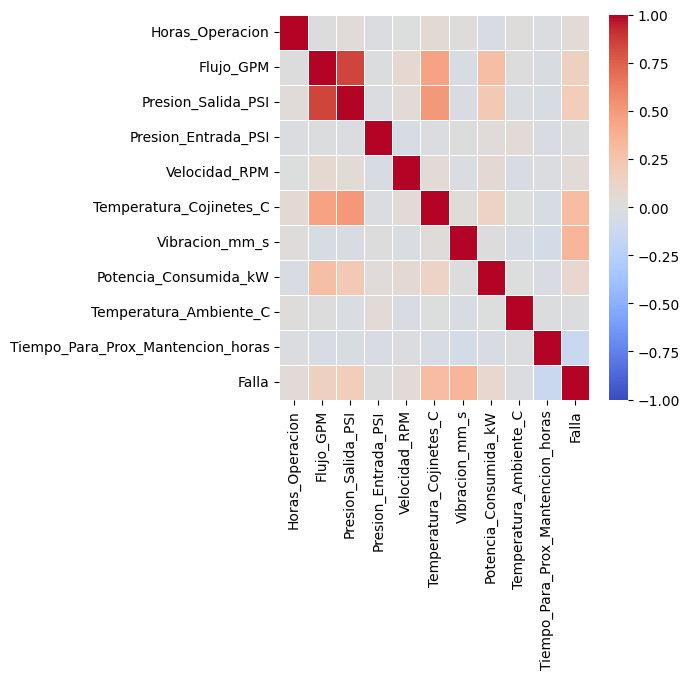

In [8]:
mc = df.corr(method="spearman")

plt.figure(figsize=(5,5))
sns.heatmap(mc, cmap="coolwarm", linewidths=0.5, cbar=True, vmin=-1, vmax=1)
plt.show()

In [9]:
corr = abs(df.corr())
corr[["Falla"]].sort_values(by="Falla", ascending=False)

,Falla
Falla,1.000000
Vibracion_mm_s,0.390816
Temperatura_Cojinetes_C,0.344613
Presion_Salida_PSI,0.180664
Tiempo_Para_Prox_Mantencion_horas,0.160192
Flujo_GPM,0.153046
Potencia_Consumida_kW,0.083097
Velocidad_RPM,0.036838
Horas_Operacion,0.031834
Temperatura_Ambiente_C,0.013966


In [10]:
y = df["Falla"]
X = df.drop(["Falla"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
print("Tamaño original dataframe:", df.shape)
print("Tamaño muestra train:", X_train.shape)
print("Tamaño muestra test:", X_test.shape)

Tamaño original dataframe: (1104, 11)
Tamaño muestra train: (993, 10)
Tamaño muestra test: (111, 10)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.96      1.00      0.98        25

    accuracy                           0.99       111
   macro avg       0.98      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

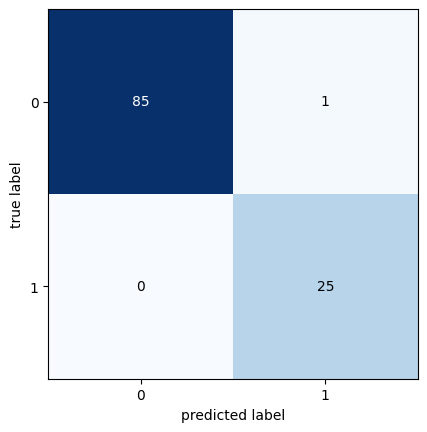

In [11]:
RF = RandomForestClassifier(random_state=42).fit(X_train, y_train)
pred_RF = RF.predict(X_test)
print(classification_report(y_test, pred_RF))
cm = confusion_matrix(y_test, pred_RF)
plot_confusion_matrix(cm)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.96      1.00      0.98        25

    accuracy                           0.99       111
   macro avg       0.98      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

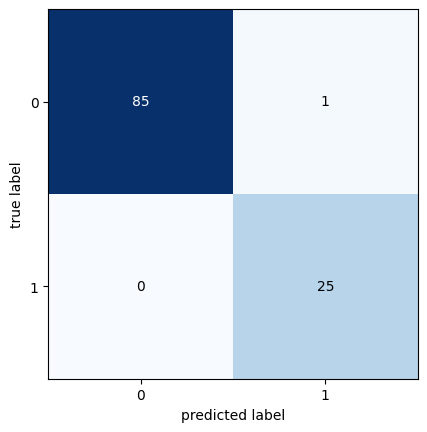

In [12]:
XGB = XGBClassifier(random_state=42).fit(X_train, y_train)
pred_XGB = XGB.predict(X_test)
print(classification_report(y_test, pred_XGB))
cm = confusion_matrix(y_test, pred_XGB)
cm = confusion_matrix(y_test, pred_RF)
plot_confusion_matrix(cm)

# Predicción

In [13]:
columnas = X.columns.tolist()
valores_entrada = []

for nombre in columnas:
  valor = float(input(f"Ingrese el valor de {nombre}: "))
  valores_entrada.append(valor)

input_df = pd.DataFrame([valores_entrada], columns=columnas)

resultado = XGB.predict_proba(input_df)
prob_falla = resultado[:,1]
print(f"La probabilidad de fallo es: {round(prob_falla[0] * 100, 2)}%")

Ingrese el valor de Horas_Operacion: 642
Ingrese el valor de Flujo_GPM: 12036
Ingrese el valor de Presion_Salida_PSI: 59
Ingrese el valor de Presion_Entrada_PSI: 38
Ingrese el valor de Velocidad_RPM: 601
Ingrese el valor de Temperatura_Cojinetes_C: 54
Ingrese el valor de Vibracion_mm_s: 2.9
Ingrese el valor de Potencia_Consumida_kW: 644
Ingrese el valor de Temperatura_Ambiente_C: 20
Ingrese el valor de Tiempo_Para_Prox_Mantencion_horas: 84
La probabilidad de fallo es: 0.04%
